In [1]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import AddTaskDatasetLoader
from my_snn.utils import train, training_plots
import torch
device = "cuda:0"

time_window = 500
batch_size = 128 # 128: anil kag
from torch.utils.data import DataLoader
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = AddTaskDatasetLoader(time_window, batch_size, randomness=True)
d_test = AddTaskDatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
ckpt_dir = 'addsum_tests'

data = train_loader, test_loader

def test_fn(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
            #snn.pool_delays('i', k= 10, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

C:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


delays: [0]
RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (r1_r1): Linear(in_features=128, out_features=128, bias=False)
  (r1_o): Linear(in_features=128, out_features=1, bias=False)
)
Total params: 16768
Total mult-adds (M): 0.8384
training custom_2_1_12850_RSNN_d_i_1l128_1d1.t7 for 5000 epochs...
Epoch [1/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


Step [1/1], Loss: 0.63429
Time elasped: 0.1080009937286377
Epoch [2/5000]
Step [1/1], Loss: 0.27974
Time elasped: 0.10200071334838867
Epoch [3/5000]
Step [1/1], Loss: 0.18719
Time elasped: 0.09999990463256836
Epoch [4/5000]
Step [1/1], Loss: 0.17428
Time elasped: 0.10202860832214355
Epoch [5/5000]
Step [1/1], Loss: 0.15579
Time elasped: 0.10197019577026367
Test set accuracy: 4.6875% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.18428
Time elasped: 0.10100078582763672
Epoch [7/5000]
Step [1/1], Loss: 0.19984
Time elasped: 0.0969991683959961
Epoch [8/5000]
Step [1/1], Loss: 0.22372
Time elasped: 0.09299969673156738
Epoch [9/5000]
Step [1/1], Loss: 0.22470
Time elasped: 0.09599947929382324
Epoch [10/5000]
Step [1/1], Loss: 0.19754
Time elasped: 0.09400081634521484
Test set accuracy: 7.03125% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.19945
Time elasped: 0.09900093078613281
Epoch [12/5000]
Step [1/1], Loss: 0.17161
Time elasped: 0.10099935531616211
Epo

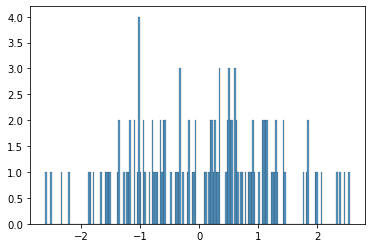

In [7]:
surr='step'

name= f'add{500}_rnn_128_{surr}'

hidden = (128, 1, 'r')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(1,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0]
RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (r1_r1): Linear(in_features=128, out_features=128, bias=False)
  (r1_o): Linear(in_features=128, out_features=1, bias=False)
)
Total params: 16768
Total mult-adds (M): 0.8384
training custom_2_1_12850_RSNN_d_i_1l128_1d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 0.48593
Time elasped: 0.1289994716644287
Epoch [2/5000]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


Step [1/1], Loss: 0.25794
Time elasped: 0.12897253036499023
Epoch [3/5000]
Step [1/1], Loss: 0.15124
Time elasped: 0.1370089054107666
Epoch [4/5000]
Step [1/1], Loss: 0.16466
Time elasped: 0.13499855995178223
Epoch [5/5000]
Step [1/1], Loss: 0.26049
Time elasped: 0.1289989948272705
Test set accuracy: 9.375% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.23616
Time elasped: 0.13296747207641602
Epoch [7/5000]
Step [1/1], Loss: 0.23097
Time elasped: 0.13097214698791504
Epoch [8/5000]
Step [1/1], Loss: 0.21501
Time elasped: 0.1329972743988037
Epoch [9/5000]
Step [1/1], Loss: 0.18973
Time elasped: 0.1360006332397461
Epoch [10/5000]
Step [1/1], Loss: 0.15765
Time elasped: 0.1360023021697998
Test set accuracy: 10.15625% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.16031
Time elasped: 0.1340014934539795
Epoch [12/5000]
Step [1/1], Loss: 0.18343
Time elasped: 0.13502931594848633
Epoch [13/5000]
Step [1/1], Loss: 0.17386
Time elasped: 0.13000011444091797
Epoch 

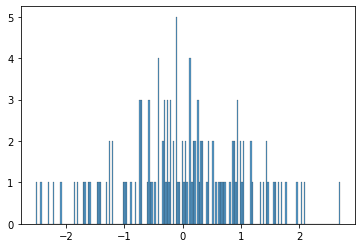

In [8]:
surr='mg'

name= f'add{500}_rnn_128_{surr}'

hidden = (128, 1, 'r')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(1,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0]
RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (r1_r1): Linear(in_features=128, out_features=128, bias=False)
  (r1_o): Linear(in_features=128, out_features=1, bias=False)
)
Total params: 16768
Total mult-adds (M): 8.384
training custom_2_1_128500_RSNN_d_i_1l128_1d1.t7 for 5000 epochs...
Epoch [1/5000]


C:\Users\Alberto\Python\SRNN_tests\my_snn\custom_dataloader.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


Step [1/1], Loss: 0.36975
Time elasped: 0.6765587329864502
Epoch [2/5000]
Step [1/1], Loss: 0.25006
Time elasped: 0.5634012222290039
Epoch [3/5000]
Step [1/1], Loss: 0.15219
Time elasped: 0.5618915557861328
Epoch [4/5000]
Step [1/1], Loss: 0.16629
Time elasped: 0.5611677169799805
Epoch [5/5000]
Step [1/1], Loss: 0.22583
Time elasped: 0.5720906257629395
Test set accuracy: 7.8125% 
--------------------------
Epoch [6/5000]
Step [1/1], Loss: 0.23522
Time elasped: 0.6060011386871338
Epoch [7/5000]
Step [1/1], Loss: 0.20741
Time elasped: 0.5550634860992432
Epoch [8/5000]
Step [1/1], Loss: 0.20990
Time elasped: 0.546698808670044
Epoch [9/5000]
Step [1/1], Loss: 0.19616
Time elasped: 0.5706324577331543
Epoch [10/5000]
Step [1/1], Loss: 0.17175
Time elasped: 0.5489988327026367
Test set accuracy: 7.03125% 
--------------------------
Epoch [11/5000]
Step [1/1], Loss: 0.18510
Time elasped: 0.5813024044036865
Epoch [12/5000]
Step [1/1], Loss: 0.18557
Time elasped: 0.5651435852050781
Epoch [13/5000

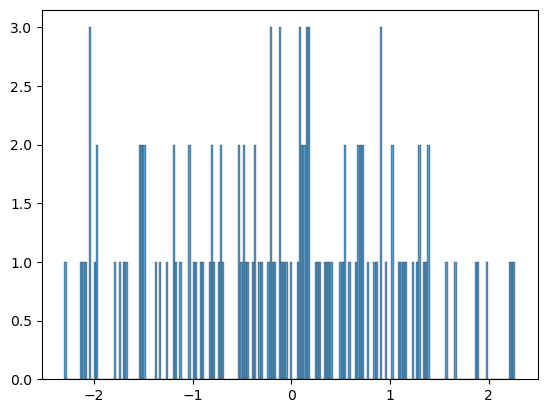

In [2]:
surr='fs'

name= f'add{500}_rnn_128_{surr}'

hidden = (128, 1, 'r')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(1,1), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)